# Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%load_ext autoreload
%autoreload 2

# UV News Data Input

In [4]:
import pandas as pd
import numpy as np

true_path = '/content/drive/MyDrive/Colab Notebooks/True.csv'
fake_path = '/content/drive/MyDrive/Colab Notebooks/Fake.csv'


true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)
display(true_df)
display(fake_df)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


# >>>>>>>>>> AUGMENTED FAKE NEWS

In [5]:
# # Data augmentation for the minority class (assuming 'fake' is the minority class)
# from sklearn.utils import shuffle
# def augment_data(df, augmentation_factor):
#     augmented_data = []
#     for _ in range(augmentation_factor):
#         df = shuffle(df).reset_index(drop=True) # Shuffle DataFrame each time
#         augmented_data.append(df.copy())
#     return pd.concat(augmented_data)


# # Example: Increase fake news data by a factor of 2
# augmented_fake_df = augment_data(fake_df, 2)

# display(augmented_fake_df)


# Data Visulization

<ipython-input-6-b3d2e6c791a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="subject", palette="coolwarm", data=true_df).set_title('True News Subject Distribution')


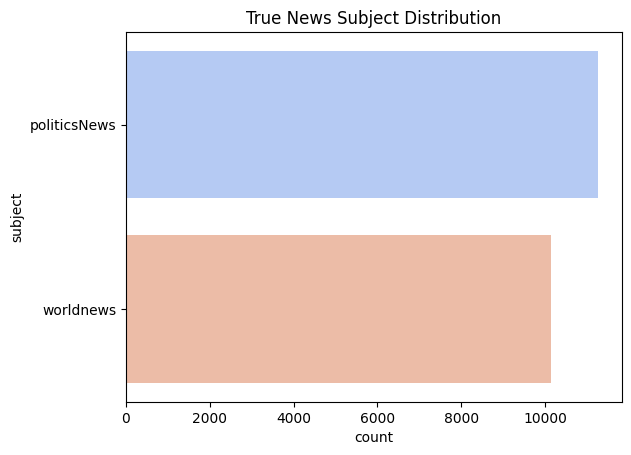

<ipython-input-6-b3d2e6c791a3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="subject", palette="coolwarm", data=fake_df).set_title('Fake News Subject Distribution')


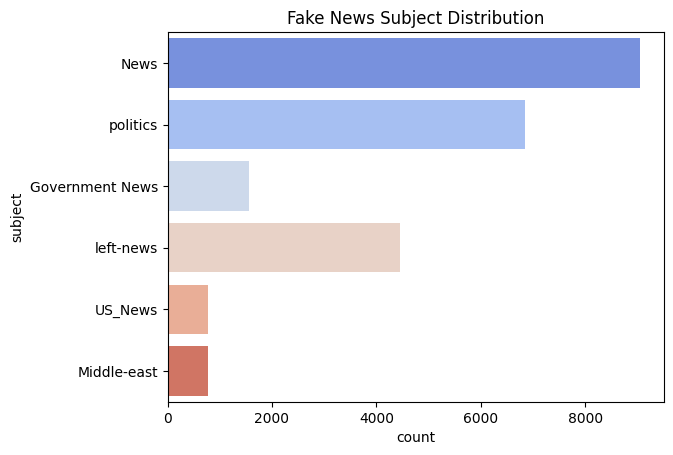

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="subject", palette="coolwarm", data=true_df).set_title('True News Subject Distribution')
plt.show()

sns.countplot(y="subject", palette="coolwarm", data=fake_df).set_title('Fake News Subject Distribution')
# sns.countplot(y="subject", palette="coolwarm", data=augmented_fake_df).set_title('Fake News Subject Distribution')
plt.show()

## Real News Word Cloud

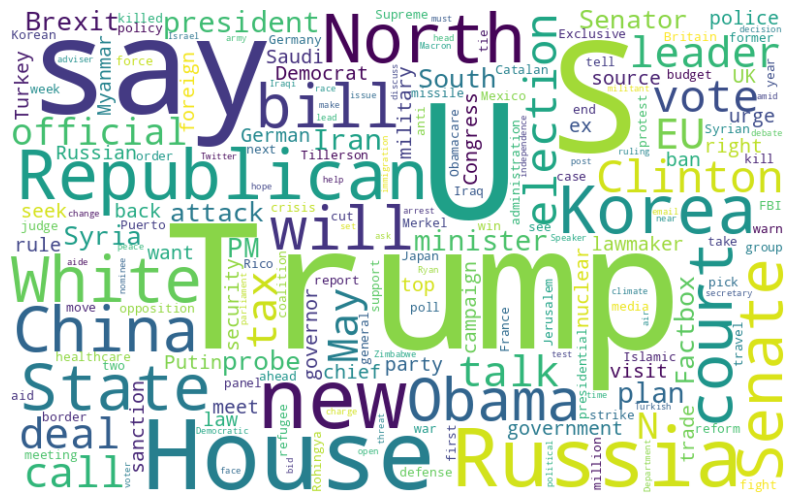

In [7]:
from wordcloud import WordCloud

real_titles = true_df.title
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

## Fake News Word Cloud

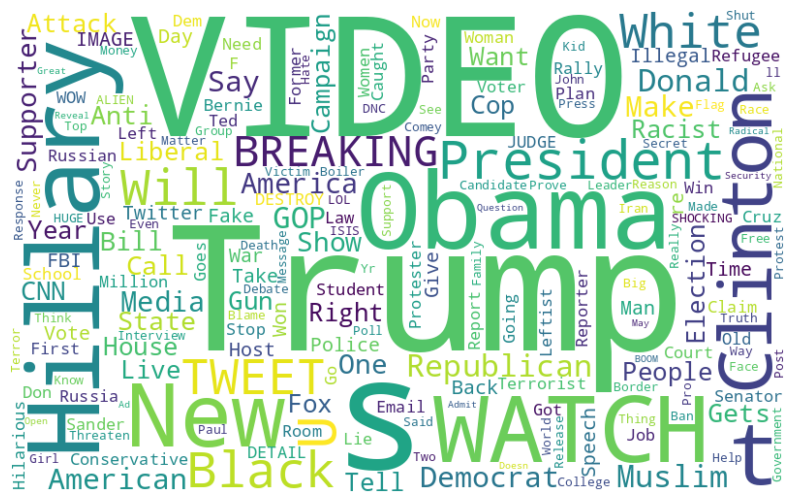

In [8]:
# fake_titles = augmented_fake_df.title
fake_titles = fake_df.title
fake_titles_ls = [text for text in fake_titles]
# print(alls)
fake_all_words = ' '.join(fake_titles)
wordcloud_fake = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(fake_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

# Data Preprocessing

## Data Combination

In [9]:
# Add Labels to both df
true_df['true'] = 1
# augmented_fake_df['true'] = 0
fake_df['true'] = 0

# Concat
df = pd.concat([true_df, fake_df])
# df = pd.concat([true_df, augmented_fake_df])
display(df)

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## Inspect Lengths of News

In [10]:
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
Mean length of the titles: 12.453472315025168


<ipython-input-11-48495321f256>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=50)


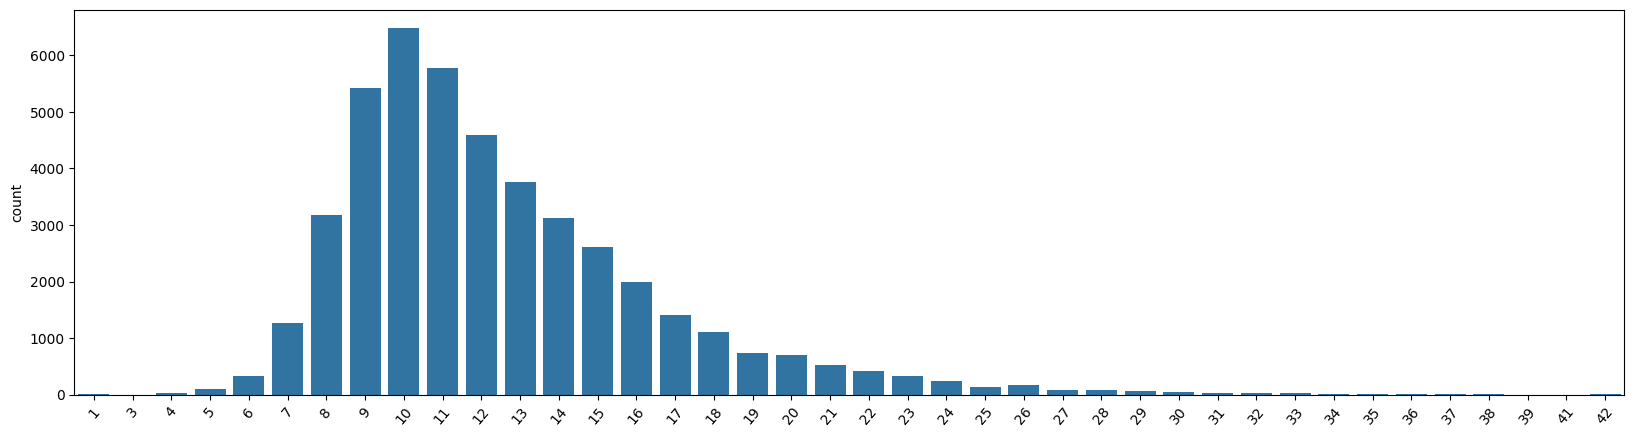

In [11]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [12]:
texts = [text for text in df.text]

max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

# g = sns.countplot(x=texts_len)
print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 405.28228428883244


## Purify & Shffle the DataFrame

In [13]:
from sklearn.utils import shuffle

# Purify
df = df.iloc[:,[1, -1]]

# Drop rows with duplicate titles, keeping the first occurrence
# df = df.drop_duplicates(subset=['title'], keep='first', inplace=True)

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,text,true
0,NEW YORK (Reuters) - NATO is the “strongest al...,1
1,NEW YORK (Reuters) - Hawaii grandmother Teresa...,1
2,(Reuters) - Britain holds a referendum on memb...,1
3,ANKARA (Reuters) - Turkey s border with northe...,1
4,"On Sunday, Rep. Devin Nunes (R-Calif.) said th...",0
...,...,...
44893,WASHINGTON (Reuters) - Three of President Dona...,1
44894,"This year, let s try something a little differ...",0
44895,Does anyone else get the sense Hillary is not ...,0
44896,(Reuters) - U.S. President Donald Trump promis...,1


## Split Data into Training, Validation, Test

In [14]:
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (28734, 2)
valset size: (7184, 2)
testset size: (8980, 2)


## Data distribution imbalanced

In [15]:
# train_imbalanced = 1/10
# val_imbalanced = 1/10
# test_imbalanced = 1/10

# train_true = train_df[train_df['true'] == 1]
# train_fake = train_df[train_df['true'] == 0]
# train_fake = train_fake.iloc[:round(len(train_fake)*train_imbalanced),:]
# train_true_len = len(train_true)
# train_fake_len = len(train_fake)
# train_df = pd.concat([train_true, train_fake])

# val_true = val_df[val_df['true'] == 1]
# val_fake = val_df[val_df['true'] == 0]
# val_fake = val_fake.iloc[:round(len(val_fake)*val_imbalanced),:]
# val_true_len = len(val_true)
# val_fake_len = len(val_fake)
# val_df = pd.concat([val_true, val_fake])

# test_true = test_df[test_df['true'] == 1]
# test_fake = test_df[test_df['true'] == 0]
# test_fake = test_fake.iloc[:round(len(test_fake)*test_imbalanced),:]
# test_true_len = len(test_true)
# test_fake_len = len(test_fake)
# test_df = pd.concat([test_true, test_fake])

# len_df = pd.DataFrame({'ind': ['Train', 'Validation', 'Test'], 'True': [train_true_len, val_true_len, test_true_len], 'Fake': [train_fake_len, val_fake_len, test_fake_len]})
# len_df.set_index('ind', inplace=True)
# len_df.index.name = None

# len_df

## Dataframe to csv

In [16]:
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

## Concatenate all dataframe

In [17]:
df = pd.concat([train_df, val_df, test_df])
df

,text,true
0,BERLIN (Reuters) - Qatar is ready to sit at th...,1
1,Daily Shooter 21st Century WireJust as ISIS is...,0
2,IMAGE: Globalist scribe for the American branc...,0
3,BERNIE SANDERS decided to go after the religio...,0
4,SAN FRANCISCO (Reuters) - U.S. President Barac...,1
...,...,...
8975,PARIS (Reuters) - French voters view far lefti...,1
8976,21st Century Wire says Washington s Russian wi...,0
8977,RIO DE JANEIRO (Reuters) - Police shot and kil...,1
8978,"WASHINGTON/BRIDGEWATER, N.J. (Reuters) - Presi...",1


## Performing Data Cleaning

In [5]:
# !pip install --force-reinstall gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstall

In [1]:
# !pip install gensim # Install gensim using pip
import gensim
import nltk
# Downloading Stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [19]:
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [20]:
import gensim

# Applying The Function To The Dataframe
df['clean'] = df['text'].apply(preprocess)

##>>>>>Added Extra Stemming function

In [21]:
# prompt: I have to perform a stemming on the DF data sets title column Write the code for it

from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to perform stemming on a list of words
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Apply stemming to the 'clean' column
df['stemmed'] = df['clean'].apply(stem_words)


## Obtaining The Total Words Present In The Dataset

In [22]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

108258

## Preparing The Data By Performing Tokenization And Padding

In [23]:
from nltk import word_tokenize

In [24]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(train_df['text'])

train_sequences = tokenizer.texts_to_sequences(train_df['text'])
val_sequences = tokenizer.texts_to_sequences(val_df['text'])
test_sequences = tokenizer.texts_to_sequences(test_df['text'])

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_val = pad_sequences(val_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 42, padding = 'post', truncating = 'post')

# BERT

In [26]:
!pip install transformers

import torch
from transformers import BertTokenizer

In [27]:
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

## Load Dataset Class

In [28]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    # def __init__(self, mode, tokenizer):
    def __init__(self, mode, tokenizer, max_len=512): #--------------
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer

        self.max_len = max_len # Store max_len -------------------

    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label = label if label != '' else '0'
            label_tensor = torch.tensor(int(label))
        else:
            statement, label = self.df.iloc[idx, :].values
            label = label if label != '' else '0'
            label_tensor = torch.tensor(int(label))


        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)

#
        # tokens_b = self.tokenizer.tokenize(text_b)
        # word_pieces += tokens_b + ["[SEP]"]
        # len_b = len(word_pieces) - len_a

        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)


        # tokens_tensor = torch.cat([tokens_tensor, torch.zeros(self.max_len - len(tokens_tensor), dtype=torch.long)])
        # segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        # segments_tensor = torch.cat([segments_tensor, torch.zeros(self.max_len - len(segments_tensor), dtype=torch.long)])
        # return (tokens_tensor, segments_tensor, label_tensor)

        if len(tokens_tensor) < self.max_len:
            tokens_tensor = torch.cat([tokens_tensor, torch.zeros(self.max_len - len(tokens_tensor), dtype=torch.long)])
        else:
            tokens_tensor = tokens_tensor[:self.max_len]

        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        # Pad or truncate segments_tensor to max_len
        if len(segments_tensor) < self.max_len:
            segments_tensor = torch.cat([segments_tensor, torch.zeros(self.max_len - len(segments_tensor), dtype=torch.long)])
        else:
            segments_tensor = segments_tensor[:self.max_len]


        return (tokens_tensor, segments_tensor, label_tensor)

    def __len__(self):
        return self.len


# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer, max_len=512)
valset = FakeNewsDataset('val', tokenizer=tokenizer, max_len=512)
testset = FakeNewsDataset('test', tokenizer=tokenizer, max_len=512)
# trainset = FakeNewsDataset('train', tokenizer=tokenizer)
# valset = FakeNewsDataset('val', tokenizer=tokenizer)
# testset = FakeNewsDataset('test', tokenizer=tokenizer)

print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())

trainset size: 28734
valset size: 7184
testset size:  8980


## Sampling and Observing Tensors

In [29]:
sample_idx = 0
statement, label = trainset.df.iloc[sample_idx].values
# statement = trainset.df.iloc[sample_idx]['title']
# label = trainset.df.iloc[sample_idx]['true']

tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]
tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)

print(f"""
original_statement:
{statement}

tokens:
{tokens}

label: {label}

--------------------

tokens_tensor:
{tokens_tensor}

segments_tensor:
{segments_tensor}

label_tensor:
{label_tensor}

""")


original_statement:
BERLIN (Reuters) - Qatar is ready to sit at the negotiating table to try to end a dispute with its Gulf Arab neighbors, Emir Sheikh Tamim bin Hamad al-Thani said on Friday in Berlin. Saudi Arabia, the United Arab Emirates, Egypt and Bahrain cut diplomatic and trade links with Qatar on June 5, accusing the world s biggest exporter of liquefied natural gas of financing terrorism and cozying up to their arch-rival Iran. Doha denies the charges. Saudi Arabia s Crown Prince Mohammed bin Salman spoke by phone with Sheikh Tamim a week ago in what looked like a breakthrough. But Riyadh promptly suspended any dialogue with Doha, accusing it of  distorting facts  in its news agency s report of the interaction.  As you know we have had a siege of more than 100 days against Qatar,  Sheikh Tamim told a joint news conference with German Chancellor Angela Merkel in Berlin.  We spoke about Qatar s readiness to sit at the table to solve this issue.  For her part, Merkel said she wa

## Reforming the Dataset to Fit the Model

In [30]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence


def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]


    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None

    # Zero Padding
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)


    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)

    return tokens_tensors, segments_tensors, masks_tensors, label_ids


BATCH_SIZE = 32
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)

In [31]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape}
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")


tokens_tensors.shape   = torch.Size([32, 512])
tensor([[  101,  4068,  1006,  ...,     0,     0,     0],
        [  101,  3679, 13108,  ..., 16280,  3126,  1010],
        [  101,  3746,  1024,  ...,     0,     0,     0],
        ...,
        [  101,  8344,  1006,  ...,     0,     0,     0],
        [  101, 18906,  7913,  ...,  2005,  2122,  2601],
        [  101,  2003,  2023,  ...,     0,     0,     0]])
------------------------
segments_tensors.shape = torch.Size([32, 512])
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
------------------------
masks_tensors.shape    = torch.Size([32, 512])
tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]])
----------

## Model Construction

In [32]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()
# Step 2: Freeze the first 11 layers of the model
for name, param in model.named_parameters():
    if "encoder.layer" in name:  # Only process layers within the encoder
        layer_num_str = name.split('.')[4]  # Extract layer number string
        if layer_num_str.isdigit():  # Check if it's a number
            layer_num = int(layer_num_str)
            if layer_num < 11:
                param.requires_grad = False


print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))


name             module
-----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout          Dropout(p=0.1, inplace=False)
classifier       Linear(in_features=768, out_features=2, bias=True)


In [33]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.50.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

# Fine-Tuning of BERT

In [34]:
# %%time
import os
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

# model.train()
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# NUM_EPOCHS = 3

# for epoch in range(NUM_EPOCHS):
#     train_loss = 0.0
#     train_acc = 0.0

#     loop = tqdm(trainloader)
#     for batch_idx, data in enumerate(loop):
#         tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]


#         optimizer.zero_grad()

#         outputs = model(input_ids=tokens_tensors,
#                         token_type_ids=segments_tensors,
#                         attention_mask=masks_tensors,
#                         labels=labels)

#         loss = outputs[0]
#         loss.backward()
#         optimizer.step()

#         logits = outputs[1]
#         _, pred = torch.max(logits.data, 1)
#         train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())


#         train_loss += loss.item()

#         # if batch_idx == len(trainloader)-1:
#         #     _, acc = get_predictions(model, trainloader, compute_acc=True)

#         loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
#         loop.set_postfix(acc = train_acc, loss = train_loss)

#          # Save the model at the end of each epoch
#     model_path = os.path.join('/content/drive/MyDrive', f"model_epoch_{epoch+1}.pth")
#     torch.save(model, model_path)
#     print(f"Model saved at {model_path}")



device: cuda:0


## Save Model

In [ ]:
# torch.save(model, './best_model.pth')

# print('Model saved!')

In [ ]:
# Save the model to your Google Drive
# model_save_path = '/content/drive/MyDrive/0.9985375840889149.pth'  # Change to your desired path
# torch.save(model, model_save_path)

# print(f'Model saved to {model_save_path}!')


## Load Model

In [35]:
model = torch.load('/content/drive/MyDrive/model_epoch_3.pth', weights_only=False)
model = model.to(device)

# Test

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true=[]
predictions=[]
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]

        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors,
                    token_type_ids=segments_tensors,
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())

[[9.99768143e-01 0.00000000e+00]
 [2.31857176e-04 1.00000000e+00]]
Acc:  0.9998886414253898


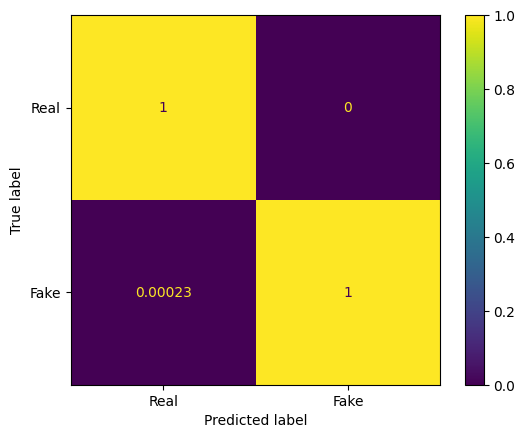

In [37]:
cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='pred')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()

print('Acc: ', accuracy_score(predictions,true))

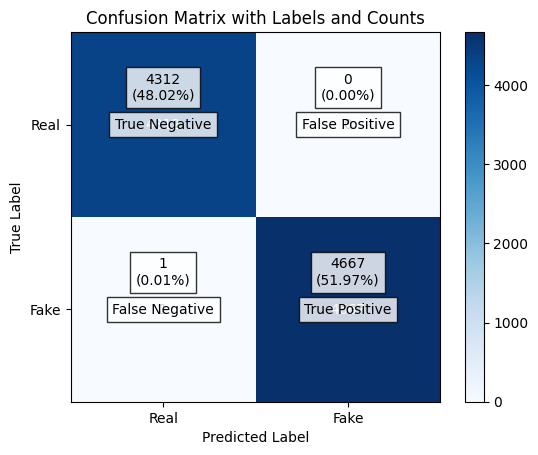

In [44]:
cm = confusion_matrix(true, predictions, labels=[1, 0])

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d') # 'd' for integer format

# Add annotations (labels and counts)
plt.title('Confusion Matrix with Labels and Counts')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        # Display count
        # plt.text(j, i - 0.25, str(cm[i, j]), ha='center', va='center', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
        # # Display percentage below count
        # plt.text(j, i - 0.15, f'{cm[i, j] / np.sum(cm) * 100:.2f}%', ha='center', va='center', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))  # Adjust vertical offset as needed

        cell_text = f"{cm[i, j]}\n({cm[i, j] / np.sum(cm) * 100:.2f}%)"
        plt.text(j, i-0.20, cell_text, ha='center', va='center', color='black', fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add custom labels for quadrants
plt.text(0, 0, 'True Negative', ha='center', va='center', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.text(1, 0, 'False Positive', ha='center', va='center', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.text(0, 1, 'False Negative', ha='center', va='center', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.text(1, 1, 'True Positive', ha='center', va='center', color='black', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


plt.show()

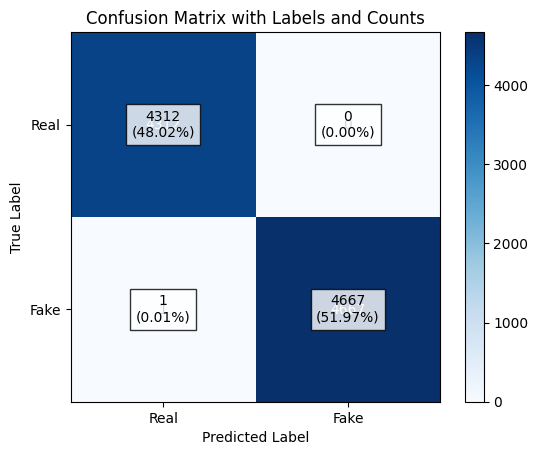

In [40]:
cm = confusion_matrix(true, predictions, labels=[1, 0])

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d')  # 'd' for integer format

# Add annotations (labels and counts)
plt.title('Confusion Matrix with Labels and Counts')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        # Combine count and percentage into a single box
        cell_text = f"{cm[i, j]}\n({cm[i, j] / np.sum(cm) * 100:.2f}%)"
        plt.text(j, i, cell_text, ha='center', va='center', color='black', fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.8))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [ ]:
df = pd.DataFrame({"pred_label": predictions})

df_pred = pd.concat([testset.df.loc[:, ['text']],
                          testset.df.loc[:, ['true']],
                          df.loc[:, 'pred_label']], axis=1)
# df_pred.to_csv('bert_1_prec_training_samples.csv', index=False)
df_pred

,text,true,pred_label
0,Donald Trump has his staff working on the logi...,0,0
1,(Reuters) - Kansas Governor Sam Brownback on T...,1,1
2,In response to the establishment media s cont...,0,0
3,How very charitable of the Lutheran and Cath...,0,0
4,TIRANA (Reuters) - The United States urged its...,1,1
...,...,...,...
8975,***WARNING***GRAPHIC LanguageThis video contai...,0,0
8976,This is so worth the watch! Brit Paul Joseph W...,0,0
8977,One of the countries Mooch and her taxpayer fu...,0,0
8978,Fox News and Republican front-runner Donald Tr...,0,0


In [ ]:
from sklearn.metrics import classification_report # Import the necessary function

print(classification_report(df_pred.true, df_pred.pred_label))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4688
           1       1.00      1.00      1.00      4292

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [ ]:
# Import necessary libraries for ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Insight on Wrong Classification

In [ ]:
wrong_df = df_pred[df_pred.true != df_pred.pred_label]
sns.countplot(y="true", palette="coolwarm", data=wrong_df).set_title('Wrong Classification Result Real/Fake Distribution')
plt.show()

In [ ]:
# prompt: write a function that take text as a input and give output as true and false that is produced by trained model

import torch
from transformers import BertTokenizer
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from transformers import BertForSequenceClassification

# Load the saved model and tokenizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = torch.load('/content/drive/MyDrive/FakeNewsDetectionFinal/model_epoch_3.pth', weights_only=False) # Replace with your model path
model = model.to(device)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


class FakeNewsDataset: # Simplified for prediction
    def __init__(self, statement, tokenizer, max_len=512):
        self.statement = statement
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __getitem__(self, idx):
        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(self.statement)
        word_pieces += statement + ['[SEP]']
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)

        if len(tokens_tensor) < self.max_len:
            tokens_tensor = torch.cat([tokens_tensor, torch.zeros(self.max_len - len(tokens_tensor), dtype=torch.long)])
        else:
            tokens_tensor = tokens_tensor[:self.max_len]

        segments_tensor = torch.tensor([0] * len(word_pieces), dtype=torch.long)
        if len(segments_tensor) < self.max_len:
            segments_tensor = torch.cat([segments_tensor, torch.zeros(self.max_len - len(segments_tensor), dtype=torch.long)])
        else:
            segments_tensor = segments_tensor[:self.max_len]

        return tokens_tensor, segments_tensor


    def __len__(self):
        return 1


def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]

    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)

    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    return tokens_tensors, segments_tensors, masks_tensors


def predict_fake_news(text):
    dataset = FakeNewsDataset(text, tokenizer)
    loader = DataLoader(dataset, batch_size=1, collate_fn=create_mini_batch)
    with torch.no_grad():
        model.eval()
        for data in loader:
            if next(model.parameters()).is_cuda:
                data = [t.to(device) for t in data]
            tokens_tensors, segments_tensors, masks_tensors = data
            outputs = model(input_ids=tokens_tensors, token_type_ids=segments_tensors, attention_mask=masks_tensors)
            logits = outputs[0]
            _, pred = torch.max(logits.data, 1)
            return bool(pred.item()) # True for fake, False for real


# Example usage
text="Wisconsin is on pace to double the number of layoffs this year."
prediction = predict_fake_news(text)
print(f"The news is predicted to be fake: {prediction}")


The news is predicted to be fake: False


In [ ]:
wrong_titles = df_pred[df_pred.true != df_pred.pred_label].text.values
wrong_titles

array([], dtype=object)